In [1]:
# many solution to fix outlier
# boxplot, IQR, Z-score, => manage the outliers

In [2]:
#file: outlier_univar.csv
# Name,  Age,  Buy (หน่วย x 100 baht ex. 16 => 1600 baht), section (Product department ex. 1 => food, 2=> gift...) 

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
uri = 'data/outlier_univar.csv'
df = pd.read_csv(uri)

In [7]:
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
8,White,25,60.00,1
9,Bob,28,21.00,2


In [8]:
df.dtypes

Name        object
Age          int64
Buy        float64
Section      int64
dtype: object

In [9]:
df.Section = df.Section.astype('category')

In [10]:
df.dtypes

Name         object
Age           int64
Buy         float64
Section    category
dtype: object

In [11]:
df.describe()

,Age,Buy
count,10.00,10.00
mean,26.50,20.20
std,3.63,15.95
min,22.00,1.00
25%,25.00,12.62
50%,25.50,16.50
75%,28.00,20.25
max,35.00,60.00


In [12]:
# mean and median are approximately different values about 22%

In [13]:
#data visualization

In [14]:
#Boxplot and displot

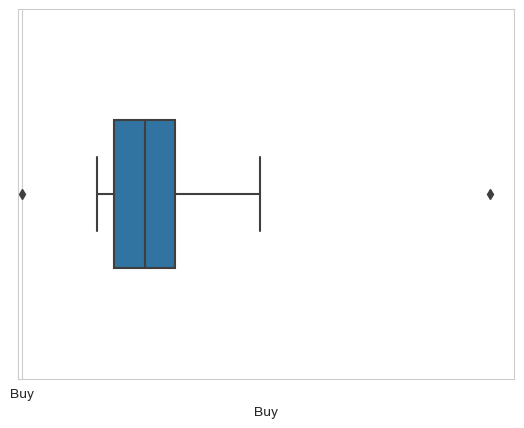

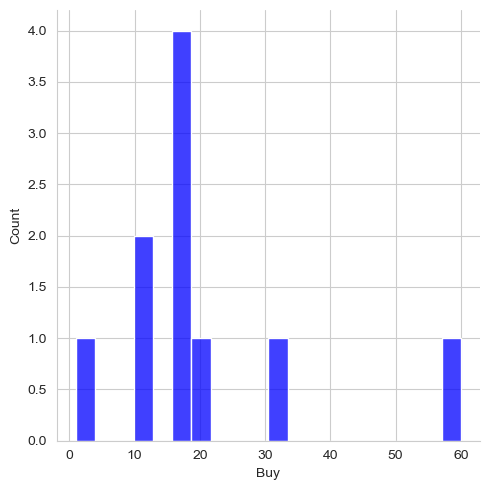

In [28]:
df.boxplot('Buy')
sns.boxplot(x=df.Buy, width=0.4)
sns.set_style('whitegrid')
sns.displot(df.Buy, kde=False, bins=20, color='b')
plt.show()

In [20]:
#IQR
# upper = Q3 + 1.5*IQR
#lower = Q1- 1.5*IQR

In [21]:
q3 = df.Buy.quantile(.75)
q1 = df.Buy.quantile(.25)

In [23]:
iqr = q3-q1
print('Q1: {}'.format(q1))
print('Q3: {}'.format(q3))
print('IQR: {}'.format(iqr))


upper = q3+(1.5*iqr)
lower = q1-(1.5*iqr)
print('Lower: {:.2f} \nUpper: {:.2f}'.format(lower, upper))

Q1: 12.625
Q3: 20.25
IQR: 7.625
Lower: 1.19 
Upper: 31.69


<Axes: xlabel='Buy'>

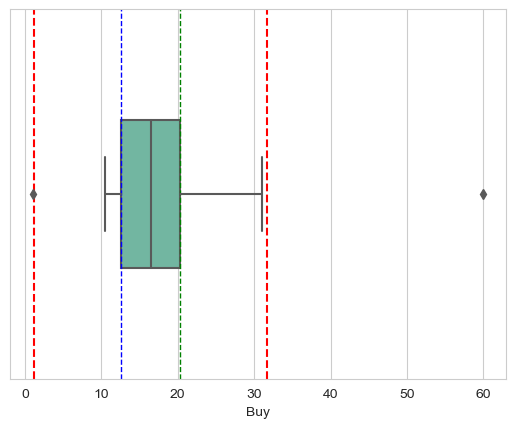

In [25]:
plt.axvline(x=q1, c='b', linestyle='--', linewidth=1)
plt.axvline(x=q3, c='g', linestyle='--', linewidth=1)
plt.axvline(x=lower, c='r', linestyle='--')
plt.axvline(x=upper, c='r', linestyle='--')
sns.boxplot(x=df.Buy, width=0.4, palette='Set2')

In [30]:
df[df.Buy > upper].count()

Name       1
Age        1
Buy        1
Section    1
dtype: int64

In [31]:
filter = df.Buy > upper
df[filter]

,Name,Age,Buy,Section
8,White,25,60.00,1


In [32]:
df.shape

(10, 4)

In [33]:
#delete

In [34]:
df.drop(df[filter].index, inplace=True)

In [35]:
df.shape

(9, 4)

In [36]:
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
9,Bob,28,21.00,2


In [38]:
df[df.Buy < lower].count()

Name       1
Age        1
Buy        1
Section    1
dtype: int64

In [39]:
filter = df.Buy < lower
df[filter]

,Name,Age,Buy,Section
7,Bash,26,1.00,2


In [40]:
df = df[df.Buy >= lower]
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
9,Bob,28,21.00,2


In [41]:
df.shape

(8, 4)

In [42]:
#recheck

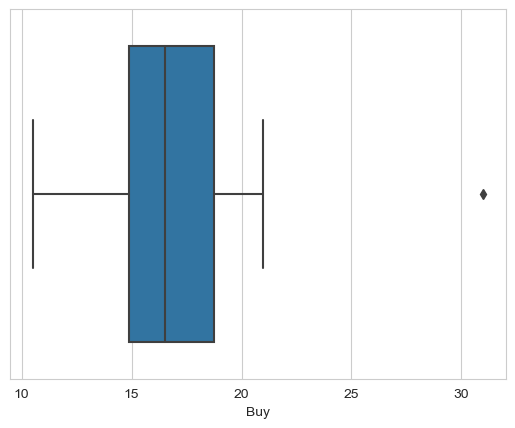

In [45]:
sns.boxplot(x=df.Buy)
plt.show()

In [46]:
q3 = df.Buy.quantile(.75)
q1 = df.Buy.quantile(.25)
iqr = q3-q1
print('Q1: {}'.format(q1))
print('Q3: {}'.format(q3))
print('IQR: {}'.format(iqr))


upper = q3+(1.5*iqr)
lower = q1-(1.5*iqr)
print('Lower: {:.2f} \nUpper: {:.2f}'.format(lower, upper))

Q1: 14.875
Q3: 18.75
IQR: 3.875
Lower: 9.06 
Upper: 24.56


In [47]:
df[df.Buy > upper].count()

Name       1
Age        1
Buy        1
Section    1
dtype: int64

In [48]:
filter = df.Buy > upper
df[filter]

,Name,Age,Buy,Section
6,Dang,23,31.00,1


In [49]:
df = df[df.Buy <= upper]
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
9,Bob,28,21.00,2


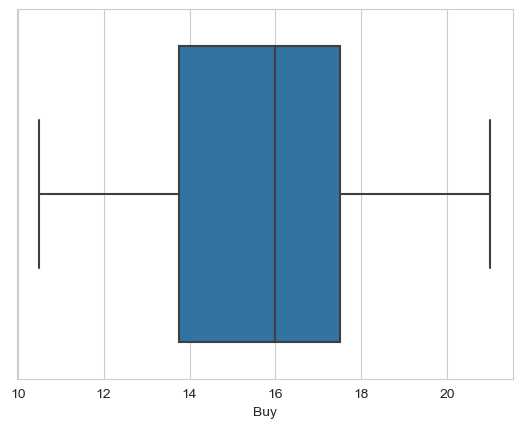

In [50]:
sns.boxplot(x=df.Buy)
plt.show()

In [51]:
df.shape

(7, 4)

In [52]:
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
9,Bob,28,21.00,2


In [53]:
#z-score

In [54]:
import numpy as np

In [55]:
lst = [5, 6, 8, 9, 10, 7.6]  #example data
mean = np.mean(lst)          #find mean
std = np.std(lst, ddof=0)    #find SD (ddof => degree of freedom)
print('mean : ', mean)       
print('std : ', std)

def z_score(x, m, s):         #function find value z-score
    return (x-m)/s           # Z-score = (x-mean)/SD

for i in lst:                  #loop for send data to z-score
    z = z_score(x=i, m=mean, s=std)
    print(round(z, 4))

mean :  7.6000000000000005
std :  1.6931233465600393
-1.5356
-0.945
0.2362
0.8269
1.4175
-0.0


In [59]:
from scipy.stats import zscore
lst = [5, 6, 8, 9, 10, 7.6]
zsc = zscore(lst, ddof=0)


for i in zsc: 
    print(round(i,4))

-1.5356
-0.945
0.2362
0.8269
1.4175
-0.0


In [60]:
uri = 'data/outlier_univar.csv'
df = pd.read_csv(uri)
df.Section = df.Section.astype('category')

In [61]:
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
8,White,25,60.00,1
9,Bob,28,21.00,2


In [62]:
from scipy.stats import zscore

In [63]:
zscore(df.Buy, ddof=0)

0   -0.15
1   -0.28
2   -0.57
3   -0.64
4   -0.21
5   -0.28
6    0.71
7   -1.27
8    2.63
9    0.05
Name: Buy, dtype: float64

In [64]:
df['zscore'] = zscore(df.Buy, ddof=0)
df

,Name,Age,Buy,Section,zscore
0,Kobkiat,25,18.00,1,-0.15
1,Ninan,22,16.00,1,-0.28
2,John,25,11.50,2,-0.57
3,Tim,35,10.50,2,-0.64
4,Steal,28,17.00,1,-0.21
5,Mark,28,16.00,2,-0.28
6,Dang,23,31.00,1,0.71
7,Bash,26,1.00,2,-1.27
8,White,25,60.00,1,2.63
9,Bob,28,21.00,2,0.05


/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_53541/2955780734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Buy, bins=20, ax=axes[0], color='b')
/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_53541/2955780734.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

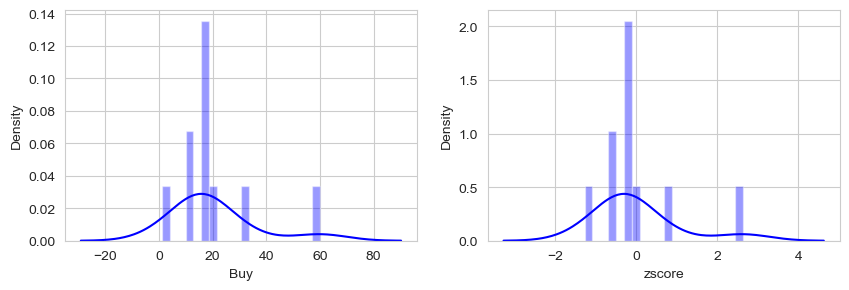

In [68]:
f, axes = plt.subplots(1, 2, figsize=(10, 3))

# Use displot or histplot instead of distplot
sns.distplot(df.Buy, bins=20, ax=axes[0], color='b')
sns.distplot(df.zscore, bins=20, ax=axes[1], color='b')

plt.show()

In [69]:
df.describe()

,Age,Buy,zscore
count,10.00,10.00,10.00
mean,26.50,20.20,0.00
std,3.63,15.95,1.05
min,22.00,1.00,-1.27
25%,25.00,12.62,-0.50
50%,25.50,16.50,-0.24
75%,28.00,20.25,0.00
max,35.00,60.00,2.63


In [70]:
threshold = 2.5
df['outlier'] = df.zscore.apply(lambda x : x <= -threshold or x >= threshold)

In [71]:
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
8,White,25,60.00,1,2.63,True
9,Bob,28,21.00,2,0.05,False


In [72]:
df[df.outlier == True]

,Name,Age,Buy,Section,zscore,outlier
8,White,25,60.00,1,2.63,True


In [73]:
df = df[df.outlier == False]

In [74]:
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
9,Bob,28,21.00,2,0.05,False


In [75]:
filter = np.abs(df.zscore) <= threshold
df = df[filter]
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
9,Bob,28,21.00,2,0.05,False


In [76]:
df.shape

(9, 6)

In [77]:
df.describe()

,Age,Buy,zscore
count,9.00,9.00,9.00
mean,26.67,15.78,-0.29
std,3.81,8.14,0.54
min,22.00,1.00,-1.27
25%,25.00,11.50,-0.57
50%,26.00,16.00,-0.28
75%,28.00,18.00,-0.15
max,35.00,31.00,0.71


<Axes: xlabel='Buy'>

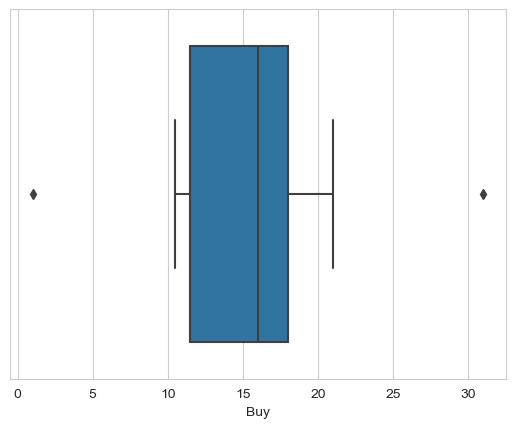

In [79]:
sns.boxplot(x=df.Buy)

In [80]:
df.drop(columns=['zscore', 'outlier'], inplace=True)
df.head()

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1


In [81]:
#outlier multivariate

In [102]:
x = [1, 2, 3, 3.2, 4, 5, 6, 8.5, 7, 9, 10, 11, 12, 4.9]
y = [1, 2.5, 3, 5.7, 4.9, 5, 5.5, 6.3, 7.3, 9, 11, 10, 12, 11.5]
data = list(zip(x, y))

df = pd.DataFrame(data, columns=['x','y'])

In [103]:
df

,x,y
0,1.00,1.00
1,2.00,2.50
2,3.00,3.00
3,3.20,5.70
4,4.00,4.90
5,5.00,5.00
6,6.00,5.50
7,8.50,6.30
8,7.00,7.30
9,9.00,9.00


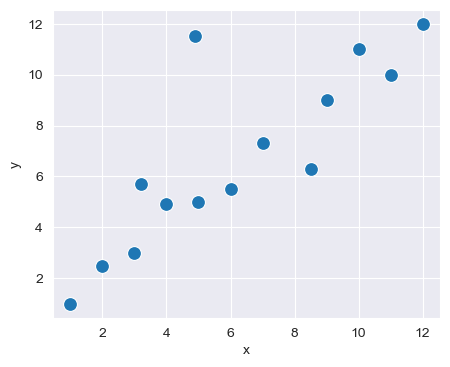

In [104]:
sns.set_style('darkgrid')
plt.figure(figsize=(5, 4))
sns.scatterplot(x='x',y='y',data=df, s=100)
plt.show()

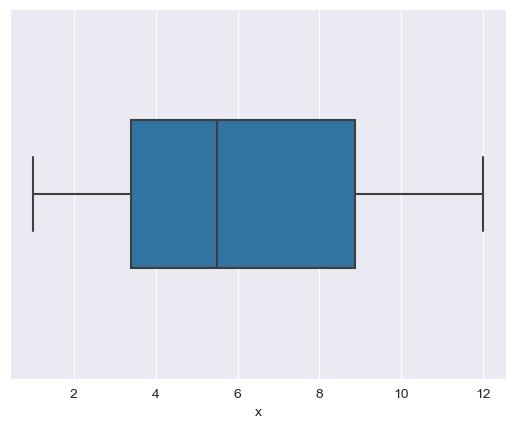

In [106]:
sns.boxplot(x=df.x, width=0.4)
plt.show()

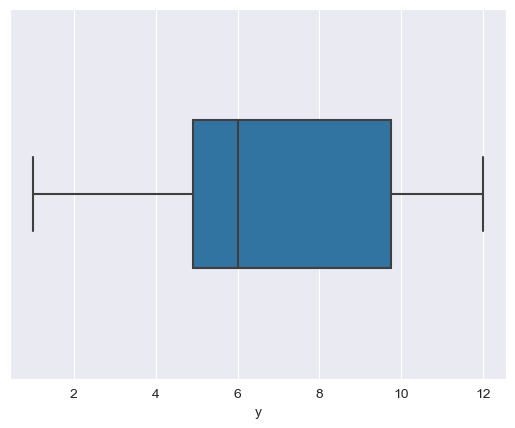

In [108]:
sns.boxplot(x=df.y, width=0.4)
plt.show()

In [109]:
#DBScan (Density-Based Spatial Clustering of Applications with Noise) 

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
d_arr = scaler.fit_transform(data)  #แปลงข้อมูลให้อยู่ระหว่าง 0-1

from sklearn.cluster import DBSCAN      # parameter for DBScan 
outlier_detection = DBSCAN(
    eps = 0.24,
    metric = 'euclidean',
    min_samples = 3,
    n_jobs = -1)

clusters = outlier_detection.fit_predict(d_arr)    #แบ่งกลุ่ม cluster


print('Outliers found: ', list(clusters).count(-1))    #จำนวนค่าผิดปกติที่พบ
clusters

Outliers found:  1


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1])

In [114]:
df['cluster'] = clusters
df['outlier'] = np.where(df.cluster == -1, True, False)

In [115]:
df.groupby('cluster').cluster.count()

cluster
-1     1
 0    13
Name: cluster, dtype: int64

/var/folders/_f/lgdnzxm94sqg34l7c05bftnh0000gn/T/ipykernel_53541/526638381.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x',y='y',data=df, style='outlier', palette = 'Set1', s=150)


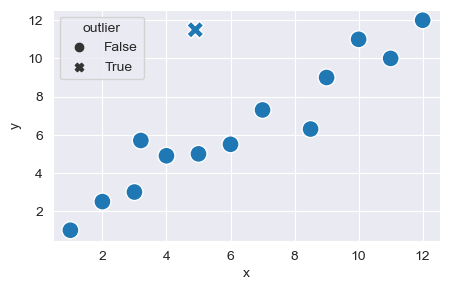

In [118]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='x',y='y',data=df, style='outlier', palette = 'Set1', s=150)
plt.show()

In [119]:
df

,x,y,cluster,outlier
0,1.00,1.00,0,False
1,2.00,2.50,0,False
2,3.00,3.00,0,False
3,3.20,5.70,0,False
4,4.00,4.90,0,False
5,5.00,5.00,0,False
6,6.00,5.50,0,False
7,8.50,6.30,0,False
8,7.00,7.30,0,False
9,9.00,9.00,0,False


In [120]:
df[df.outlier == True]

,x,y,cluster,outlier
13,4.90,11.50,-1,True


In [121]:
df = df[df.cluster > -1]
df.shape

(13, 4)

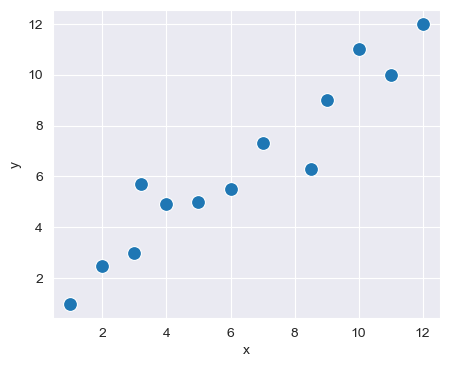

In [122]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='x',y='y',data=df,s=100)
plt.show()